***Подключене библиотек***

In [260]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN


***Описание дата-сета***

Датасет user_behavior_dataset.csv

https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset



*   Идентификатор пользователя: уникальный идентификатор для каждого пользователя.
*   Модель устройства: Модель смартфона пользователя.
*   Операционная система: ОС устройства (iOS или Android).
*   Время использования приложения: ежедневное время, потраченное на мобильные приложения, измеряемое в минутах.
*   Время включения экрана: среднее количество часов в день, когда экран активен.
*   Расход батареи: ежедневный расход батареи в мАч.
*   Количество установленных приложений: общее количество приложений, доступных на устройстве.
*   Использование данных: ежедневное потребление мобильных данных в мегабайтах.
*   Возраст: Возраст пользователя.
*   Пол: Пол пользователя (мужчина или женщина).
*   Класс поведения пользователей: классификация поведения пользователей на основе моделей использования (от 1 до 5).

***Загрузка данных***

In [261]:
data = pd.read_csv('user_behavior_dataset.csv', delimiter=',')
data

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [263]:
cat_features = ['Device Model', 'Operating System', 'Gender']

**Кодирование категориальных признаков**

In [264]:
data_work = data.copy()
enc = OneHotEncoder(drop='first', sparse_output=False)
data_transform = enc.fit_transform(data[cat_features])
data_encoded = pd.DataFrame(data_transform, columns=enc.get_feature_names_out(cat_features))

In [265]:
data_work = pd.concat([data_work.drop(columns=cat_features), data_encoded], axis=1)
data_work

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,1,393,6.4,1872,67,1122,40,4,0.0,0.0,0.0,0.0,0.0,1.0
1,2,268,4.7,1331,42,944,47,3,1.0,0.0,0.0,0.0,0.0,0.0
2,3,154,4.0,761,32,322,42,2,0.0,0.0,1.0,0.0,0.0,1.0
3,4,239,4.8,1676,56,871,20,3,0.0,0.0,0.0,0.0,0.0,1.0
4,5,187,4.3,1367,58,988,31,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,0.0,0.0,0.0,1.0,1.0,1.0
696,697,316,6.8,1965,68,1201,59,4,0.0,0.0,1.0,0.0,0.0,1.0
697,698,99,3.1,942,22,457,50,2,0.0,0.0,0.0,0.0,0.0,0.0
698,699,62,1.7,431,13,224,44,1,0.0,1.0,0.0,0.0,0.0,1.0


**Нормализация**

In [266]:
num_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [267]:
scaler = StandardScaler()
data_work[num_features] = scaler.fit_transform(data_work[num_features])

In [268]:
data_work

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,1,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,4,0.0,0.0,0.0,0.0,0.0,1.0
1,2,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,3,1.0,0.0,0.0,0.0,0.0,0.0
2,3,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,2,0.0,0.0,1.0,0.0,0.0,1.0
3,4,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,3,0.0,0.0,0.0,0.0,0.0,1.0
4,5,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,3,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,2,0.0,0.0,0.0,1.0,1.0,1.0
696,697,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,4,0.0,0.0,1.0,0.0,0.0,1.0
697,698,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,2,0.0,0.0,0.0,0.0,0.0,0.0
698,699,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,1,0.0,1.0,0.0,0.0,0.0,1.0


**Подготовка к кластеризации**

In [269]:
# Удаление столбца User ID
data_work = data_work.drop(columns=['User ID'])
# Перемещение столбца User Behavior Class в конец
data_work = pd.concat([data_work.drop(columns=['User Behavior Class']), data_work['User Behavior Class']], axis=1)

In [270]:
data_work

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male,User Behavior Class
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0.0,0.0,0.0,0.0,0.0,1.0,4
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,1.0,0.0,0.0,0.0,0.0,0.0,3
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,0.0,0.0,1.0,0.0,0.0,1.0,2
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0.0,0.0,0.0,0.0,0.0,1.0,3
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0.0,0.0,0.0,1.0,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,0.0,0.0,0.0,1.0,1.0,1.0,2
696,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,0.0,0.0,1.0,0.0,0.0,1.0,4
697,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,0.0,0.0,0.0,0.0,0.0,0.0,2
698,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,0.0,1.0,0.0,0.0,0.0,1.0,1


In [271]:
df = data_work.copy().drop(columns=['User Behavior Class'])

In [272]:
df

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,0.688256,0.367626,0.423726,0.606096,0.300405,0.126383,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.017668,-0.186771,-0.237198,-0.322441,0.022277,0.709506,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.661471,-0.415053,-0.933550,-0.693856,-0.949607,0.292989,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.181443,-0.154160,0.184279,0.197540,-0.091787,-1.539682,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.475107,-0.317218,-0.193218,0.271823,0.091028,-0.623346,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.011609,-0.447664,-0.541394,-0.916705,-0.857419,-1.373076,0.0,0.0,0.0,1.0,1.0,1.0
696,0.253407,0.498073,0.537341,0.643237,0.423843,1.709145,0.0,0.0,1.0,0.0,0.0,1.0
697,-0.972078,-0.708557,-0.712428,-1.065271,-0.738668,0.959416,0.0,0.0,0.0,0.0,0.0,0.0
698,-1.181031,-1.165120,-1.336702,-1.399544,-1.102733,0.459596,0.0,1.0,0.0,0.0,0.0,1.0


In [273]:
X = df
y = data_work['User Behavior Class']

**K-Means**

In [274]:
n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [275]:
best_metric

[3,
 0.31144146425463354,
 0.605716662100649,
 array([[-0.97902211, -0.97014182, -1.03387401, -1.02734189, -0.93284997,
         -0.00961036,  0.20141343,  0.19787986,  0.204947  ,  0.19081272,
          0.19081272,  0.55123675],
        [ 1.52229736,  1.57378019,  1.43321851,  1.42944405,  1.62719598,
         -0.0347511 ,  0.19708029,  0.16788321,  0.21167883,  0.22627737,
          0.22627737,  0.55474453],
        [ 0.24467328,  0.21050803,  0.34369789,  0.33894257,  0.14668104,
          0.02671655,  0.175     ,  0.19285714,  0.21071429,  0.21785714,
          0.21785714,  0.47142857]])]

Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

**Silhouette = 0.311 (плохое кластерное разбиение)**

**Rand Score = 0.606 (среднее восстановление)**

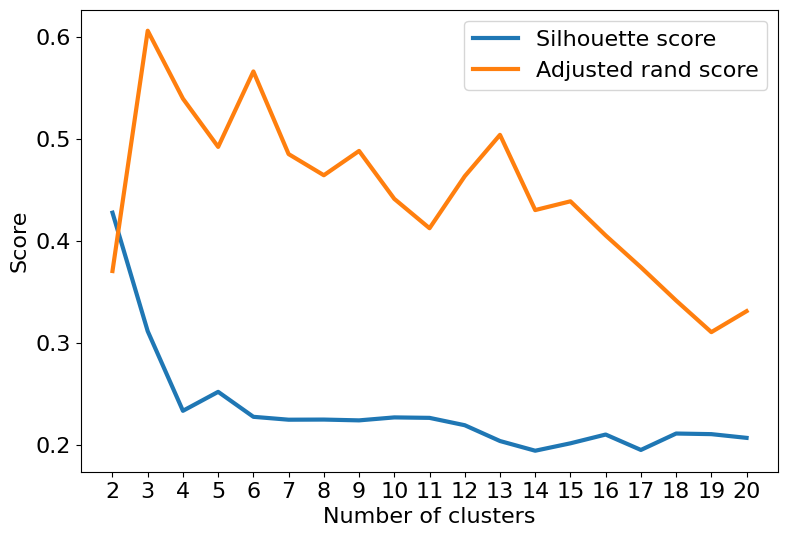

In [276]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

**Иерархическая кластеризация (дендрограмма)**

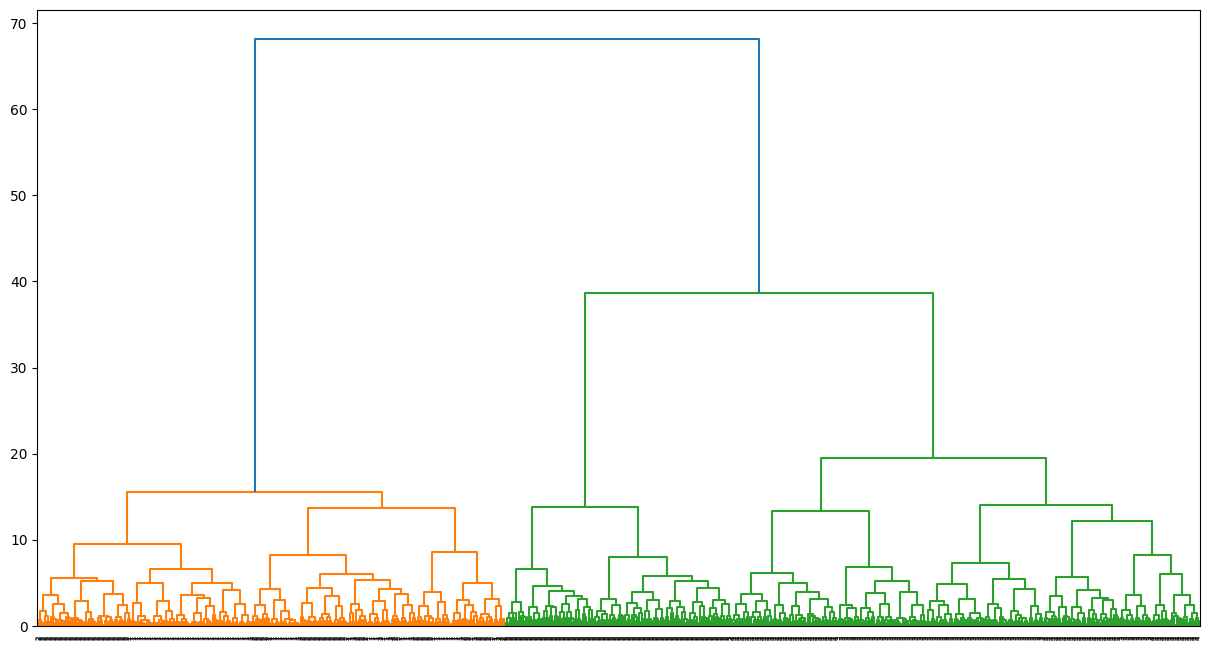

In [277]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

**DBSCAN**

In [278]:
mins = X.shape[1]
mins

12

In [279]:
db = DBSCAN(eps=0.5, min_samples=mins).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [280]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Повысил eps и уменьшил min_samples, чтобы не все значения считались выбросами (-1)

In [281]:
db = DBSCAN(eps=0.85, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [282]:
labels

array([ 0,  1,  2,  3,  4,  5,  6, 48,  7,  8,  9, 10, 11, 12,  4, 13, 14,
       -1,  9, 15, 16, -1,  6,  9, 44, 17, 57, -1, 11,  6, 18, 12,  3, 19,
       -1, 16, 20, 21, 22, 23, 18, 53, 17, 17, 24, 25, 63, 16, -1, -1, 26,
       12, 16,  2, -1, 20, 14, 53, 27,  8, 28, 26,  2, 28, 29, 30, 30, 24,
       31,  9,  7, 31, 32, 24, 20, 18, 24,  9, 33,  9, -1, 20, 34, 35,  9,
        0, 17, 36, 24, 29,  9,  9, 37, 20, 29, 27, 38, -1,  9,  1, 19, 10,
        9, 12, 39,  2,  5,  9, 18,  1, 14, 64,  9, 17, 26, 20, 20,  4, 16,
        5,  7, -1, -1, -1,  3, -1, 40,  9, 39, 24, -1, 26,  9, 36,  2, 50,
       36, 18, 21, 41, 18,  0, 42, 36, 15, 43, -1, 35, 44,  5, 38, 33, -1,
       -1, 24, 39,  2, 27, 29,  2, 16,  2,  0, 20, 18, -1, -1, 19,  9, 41,
        2,  5, 14, 40, 24,  9, 12, 56, 12, 45, 46, 32, 50, 37, -1, -1, 40,
       47, 37, 16, 20,  5, -1, 43,  6,  9, 44, 14, 47, 24, -1, 42, 35,  5,
       46, 27,  9,  5, 48,  9,  6, 21, 17, 35, 42, -1,  8, 49, 50,  2, 22,
       46, 34, 51, 46, -1

In [283]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.11
Adjusted Rand Index: 0.11


**По обоим показателям плохая кластеризация**

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, -1}


<ipython-input-284-930a7fb6284e>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_labels))


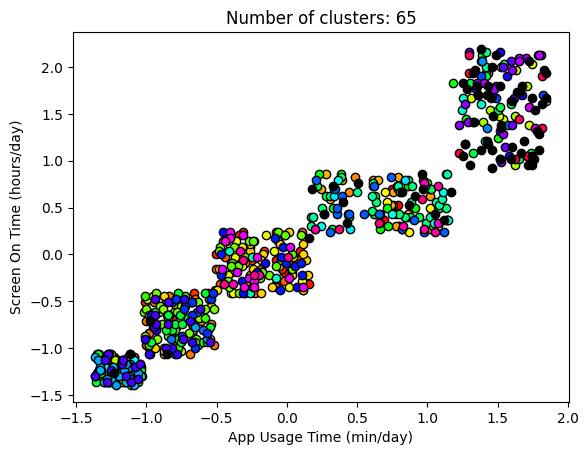

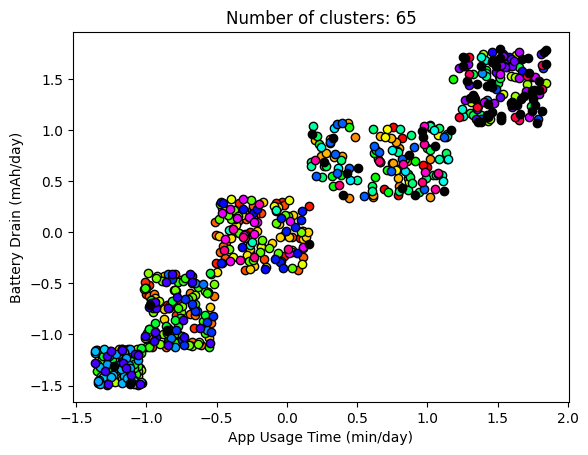

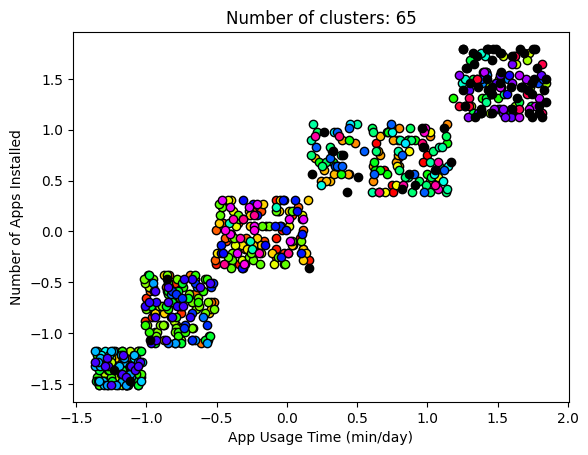

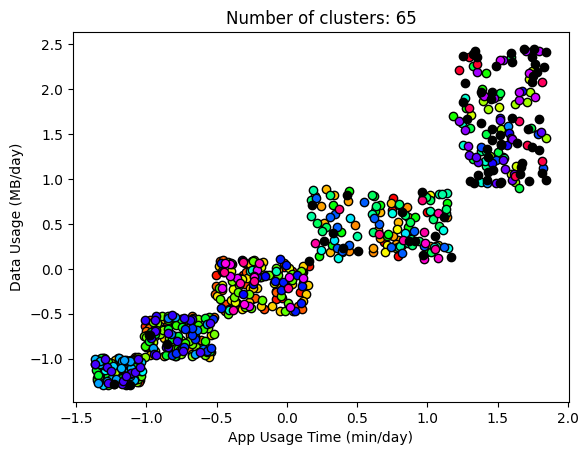

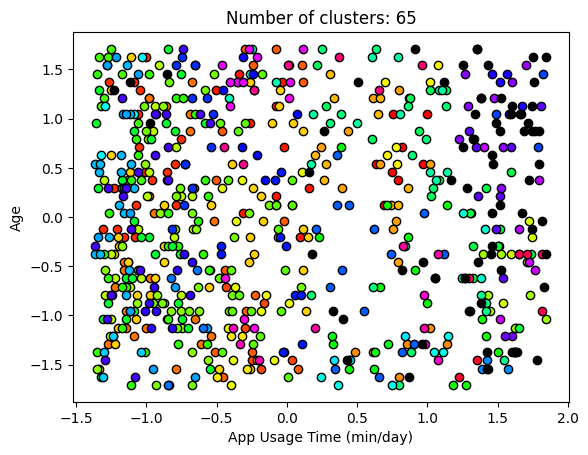

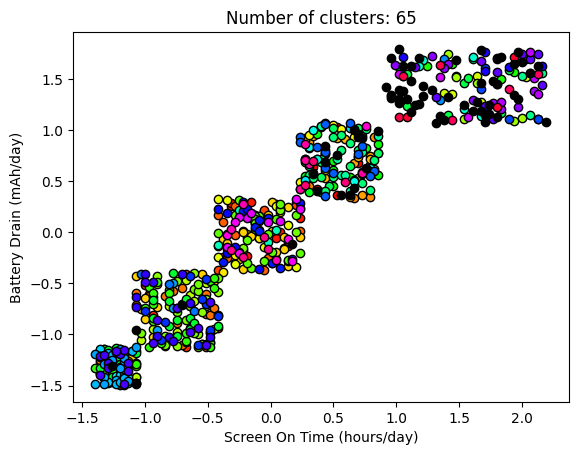

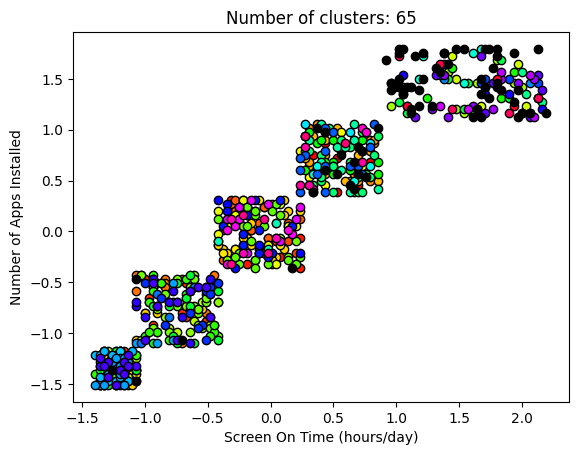

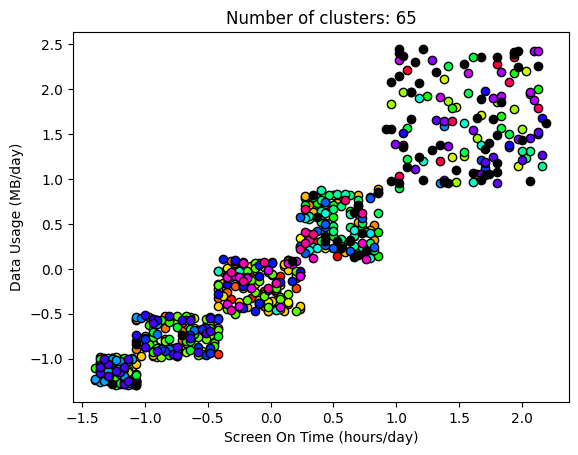

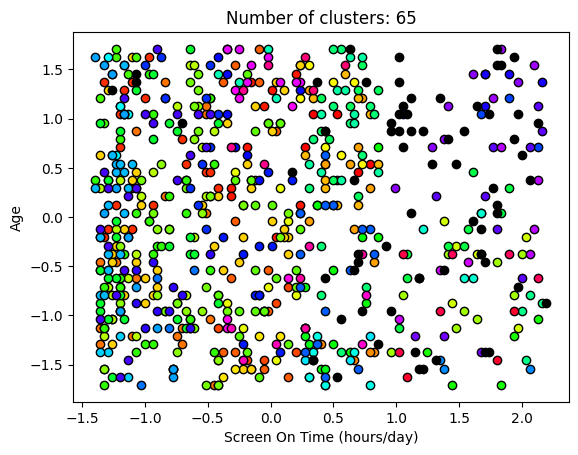

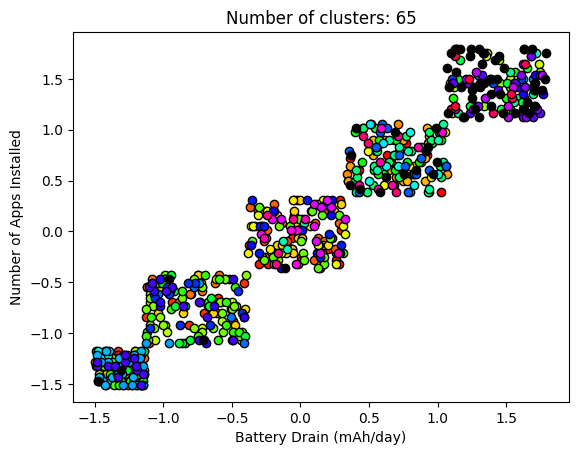

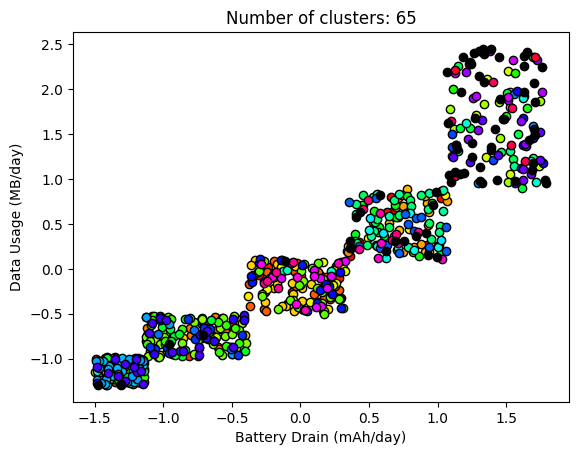

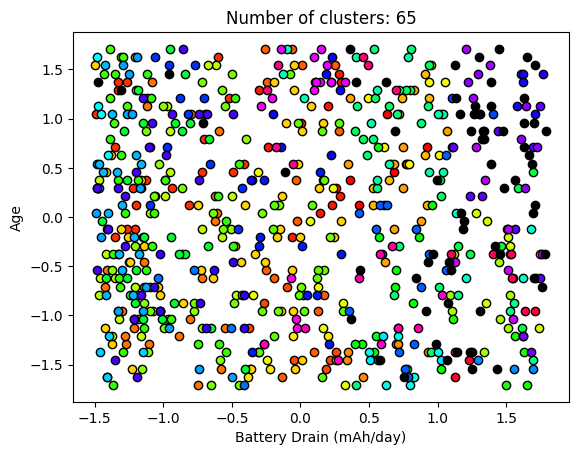

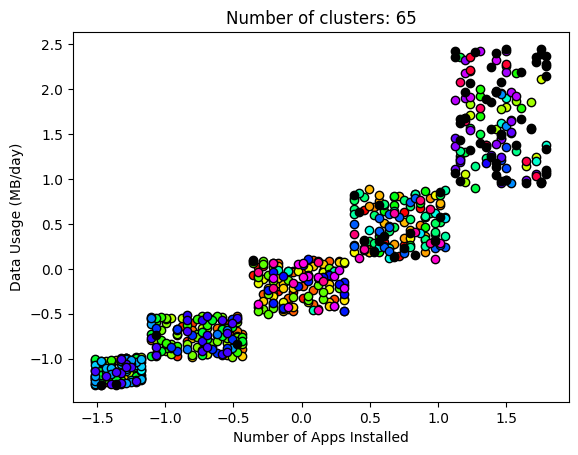

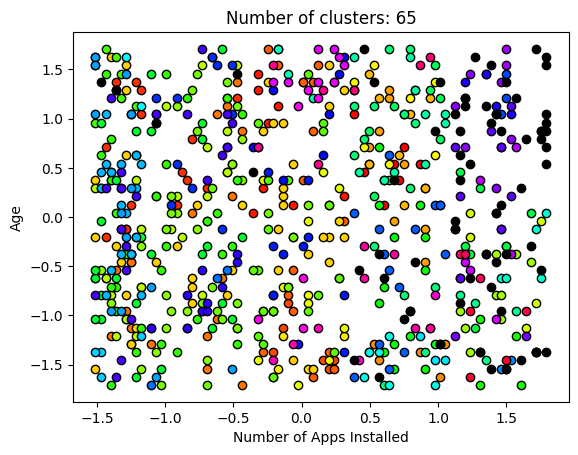

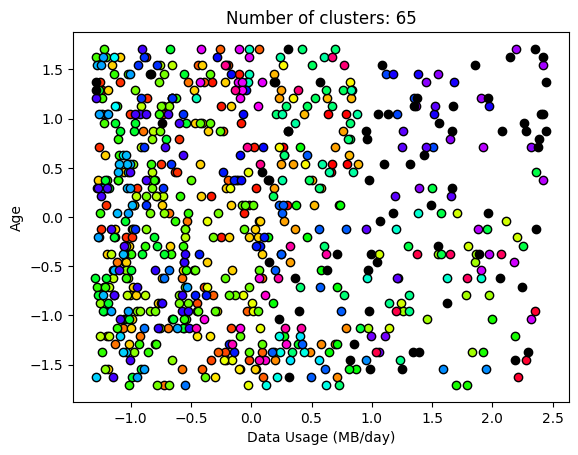

In [284]:
# Визуализация
unique_labels = set(labels)
print(unique_labels)
colors = plt.cm.get_cmap('hsv', len(unique_labels))

for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):  # Исправлено, чтобы не дублировать пары
        feature1 = num_features[i]
        feature2 = num_features[j]

        plt.figure()  # Создайте новую фигуру для каждой пары

        for k in unique_labels:
            col = colors(k)  # Используем сгенерированный цвет

            if k == -1:
                col = 'k'  # Черный для шума

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

        plt.title('Number of clusters: %d' % n_clusters_)
        plt.xlabel(feature1)  # Название оси X
        plt.ylabel(feature2)  # Название оси Y
        plt.show()

Плохая кластеризация, попробуем на меньшем количестве признаков



---



In [285]:
X = df[num_features]
y = data_work['User Behavior Class']

In [286]:
n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [287]:
best_metric

[10,
 0.4050584940089476,
 0.6167541469384339,
 array([[ 0.71165214,  0.53957838,  0.71183411,  0.70160264,  0.48989494,
          0.85122949],
        [-1.19292039, -1.24707832, -1.29188557, -1.33112567, -1.11794734,
         -0.73734032],
        [ 0.69399428,  0.52647635,  0.70628669,  0.73069965,  0.4512124 ,
         -1.02105227],
        [ 1.53682522,  1.60293201,  1.45395262,  1.44498121,  1.69616096,
          0.96803312],
        [-0.18267035, -0.10453342,  0.0120584 , -0.02100301, -0.17580002,
          0.98356141],
        [ 1.51871212,  1.56129524,  1.42353831,  1.42320862,  1.58581304,
         -0.76432114],
        [-0.21960071, -0.10215749, -0.03509389, -0.02932456, -0.16136068,
         -0.88563908],
        [-0.79851442, -0.69855652, -0.81200212, -0.7215883 , -0.77829289,
          0.82835174],
        [-1.18611379, -1.2162117 , -1.32707076, -1.35497441, -1.16023391,
          0.88305422],
        [-0.7725099 , -0.76091974, -0.75343121, -0.75976904, -0.71474565,
      

In [288]:
mins = X.shape[1]
db = DBSCAN(eps=0.6, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [289]:
labels

array([ 0,  1,  2,  1,  1,  2,  0,  3,  0,  0,  2,  1,  0,  1,  1,  3,  2,
        1,  2,  3,  2,  3,  0,  1,  1,  2,  0,  3,  0,  0,  1,  1,  1,  2,
        3,  2,  2,  3,  0,  0,  1,  3,  2,  2,  2,  3,  3,  2,  3,  3,  0,
        1,  2,  2, -1,  2,  2,  3,  0,  0,  3,  0,  2,  3,  0,  1,  1,  2,
        3,  2,  0,  3,  0,  2,  2,  1,  2,  2,  2,  1,  3,  2,  0,  2,  1,
        0,  2,  2,  2,  0,  2,  1,  2,  2,  0,  0,  3,  3,  2,  1,  2,  1,
        2,  1,  2,  2,  2,  2,  1,  1,  2, -1,  1,  2,  0,  2,  2,  1,  2,
        2,  0,  3,  3,  3,  1,  3,  0,  1,  2,  2,  3,  0,  2,  2,  2,  3,
        2,  1,  3,  3,  1,  0,  2,  2,  3,  1,  0,  2,  1,  2,  3,  2,  2,
        0,  2,  2,  2,  0,  0,  2,  2,  2,  0,  2,  1,  3,  3,  2,  1, -1,
        2,  2,  2,  0,  2,  1,  1,  1,  1,  3,  2,  0, -1,  2,  3,  3,  0,
        2,  2,  2,  2,  2,  0,  1,  0,  1,  1,  2,  2,  2,  3,  2,  2,  2,
        2,  0,  2,  2,  3,  1,  0,  3,  2,  2,  2,  3,  0,  3,  3,  2,  0,
        2,  0,  3,  2,  4

In [290]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.30
Adjusted Rand Index: 0.76


**Точки не компакты (силуэт не близок к 1), но кластерное восстановление хорошее (ренд близок к 0.8) **

{0, 1, 2, 3, 4, -1}


<ipython-input-291-930a7fb6284e>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_labels))


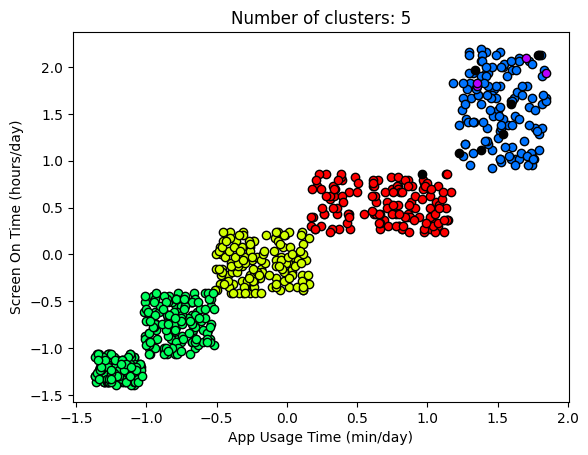

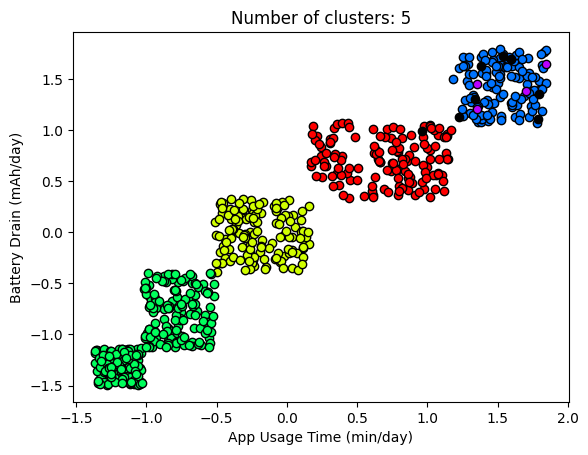

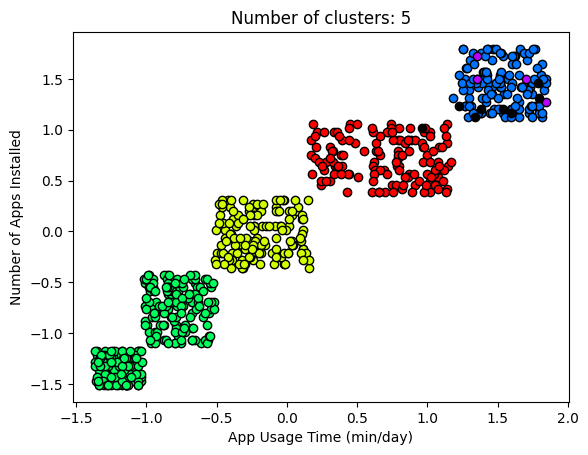

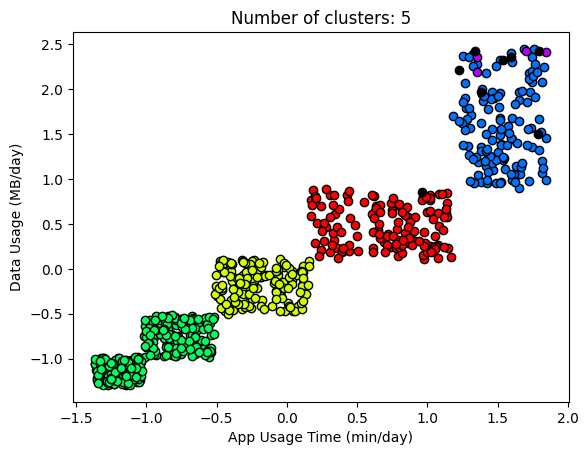

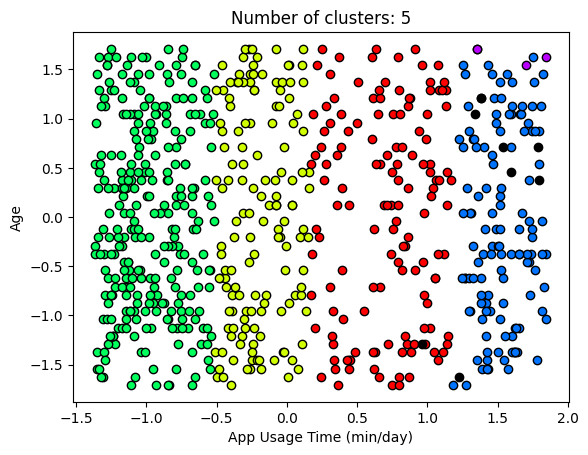

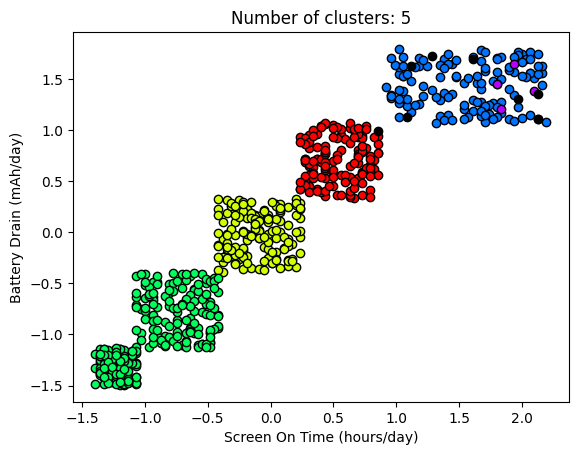

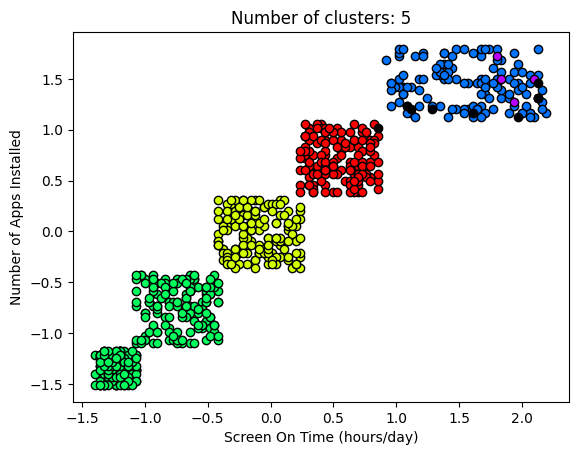

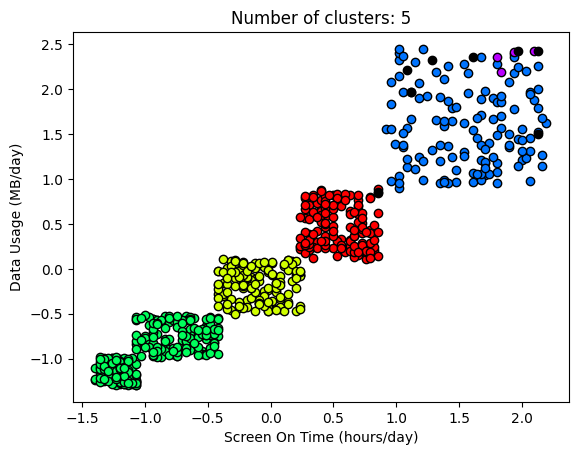

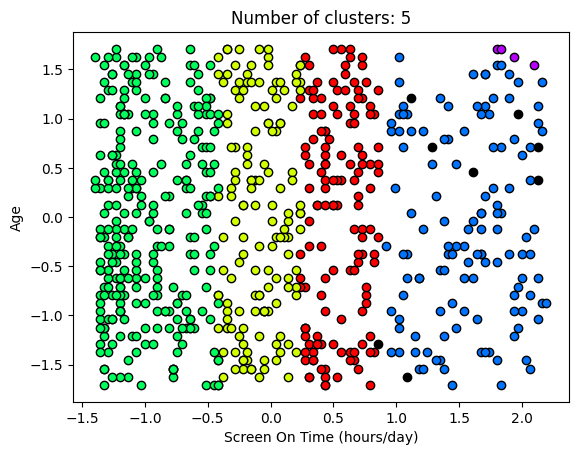

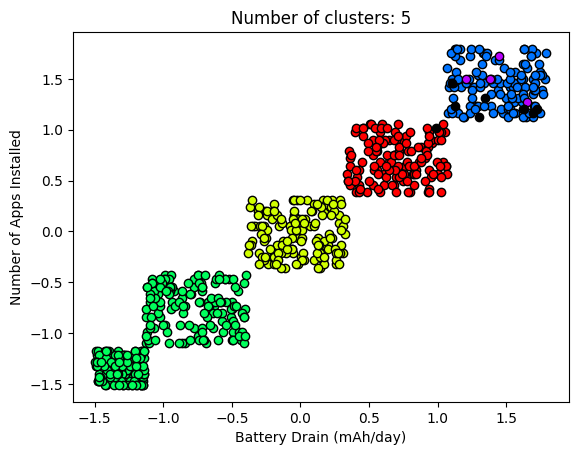

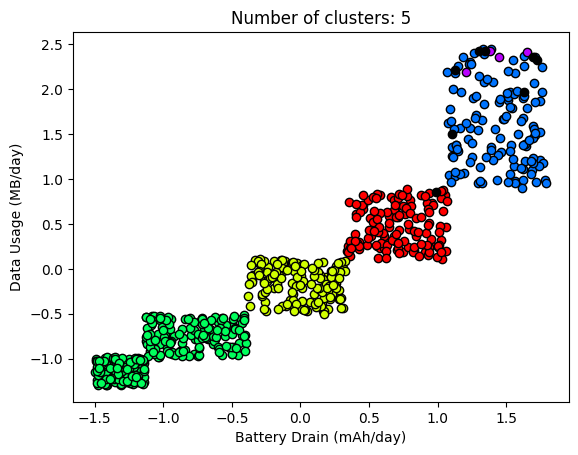

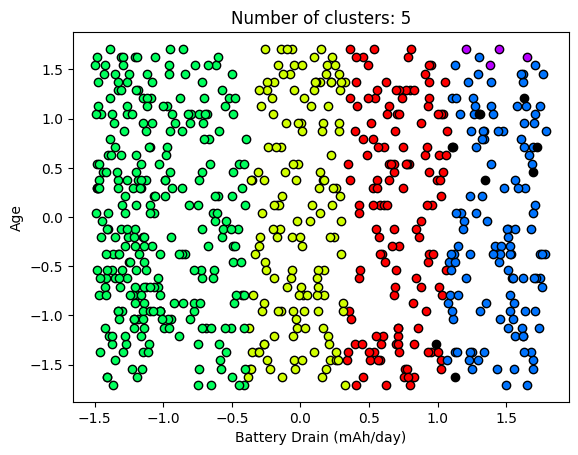

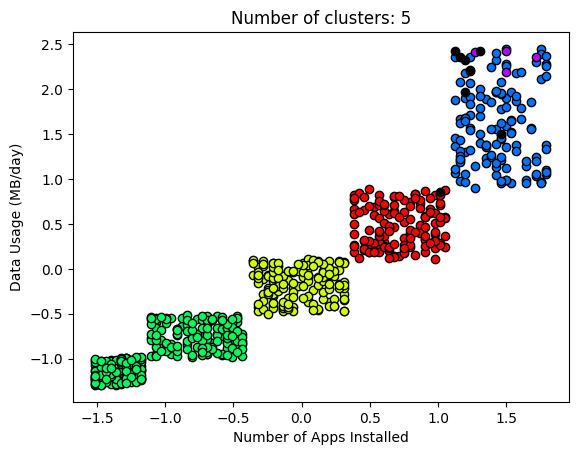

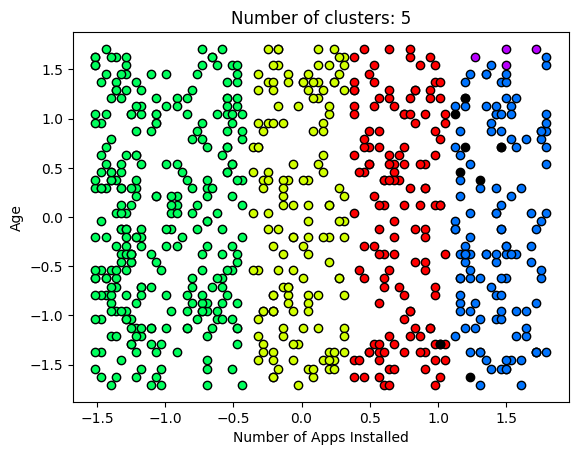

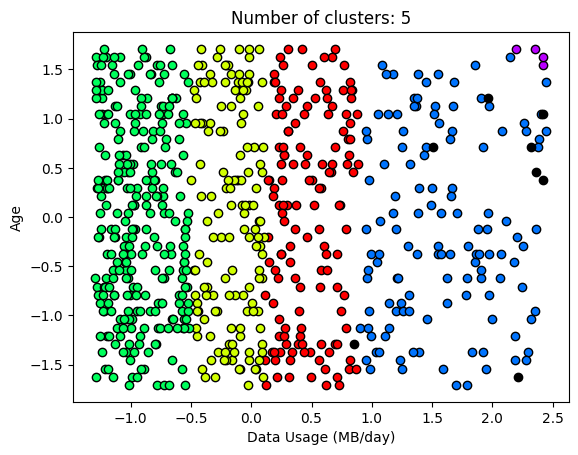

In [291]:
# Визуализация
unique_labels = set(labels)
print(unique_labels)
colors = plt.cm.get_cmap('hsv', len(unique_labels))

for i in range(len(num_features)):
    for j in range(i + 1, len(num_features)):  # Исправлено, чтобы не дублировать пары
        feature1 = num_features[i]
        feature2 = num_features[j]

        plt.figure()  # Создайте новую фигуру для каждой пары

        for k in unique_labels:
            col = colors(k)  # Используем сгенерированный цвет

            if k == -1:
                col = 'k'  # Черный для шума

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

        plt.title('Number of clusters: %d' % n_clusters_)
        plt.xlabel(feature1)  # Название оси X
        plt.ylabel(feature2)  # Название оси Y
        plt.show()

Результаты кластеризации значительно улучшились